### Student Information
Name: 陳翼弘

Student ID: 103033617

GitHub ID: YiHungChen

Kaggle name: 22215314

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
# --- import library --- #
import pandas as pd

In [2]:
# --- training data --- #
train_anger = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt", 
                          sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
train_sadness = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                            sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_fear = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
train_joy = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# --- combine 4 sub-dataset --- #
train_df = pd.concat([train_anger, train_fear, train_joy, train_sadness], ignore_index = True)

In [4]:
# --- testing data --- #
test_anger = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_sadness = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                           sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_fear = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                        sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
test_joy = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                       sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [5]:
# --- combine 4 sub-datset --- #
test_df = pd.concat([test_anger, test_fear, test_joy, test_sadness], ignore_index = True)

In [6]:
train_df.head()  # show the few data in the head

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [7]:
# --- shuffle dataset --- #
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [8]:
print(f'Shape of training df:{train_df.shape}')
print(f'Shape of testing df: {test_df.shape}')

Shape of training df:(3613, 4)
Shape of testing df: (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [10]:
train_count_vect = CountVectorizer()
train_df_counts = train_count_vect.fit_transform(train_df.text)
analyze = train_count_vect.build_analyzer()
train_df_counts.shape
train_term_frequencies = []
train_term_frequencies = np.asarray(train_df_counts.sum(axis=0))[0]
train_focus_index = np.argsort(train_term_frequencies)[::-1]
train_focus_voc = [train_count_vect.get_feature_names()[i] for i in train_focus_index[:]]
print(f'first 30 frequent voc in training data: {train_focus_voc[:30]}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


first 30 frequent voc in training data: ['the', 'to', 'and', 'you', 'of', 'is', 'it', 'in', 'that', 'my', 'for', 'on', 'be', 'me', 'this', 'so', 'have', 'not', 'just', 'but', 'with', 'at', 'can', 'like', 'all', 'are', 'your', 'was', 'when', 'if']


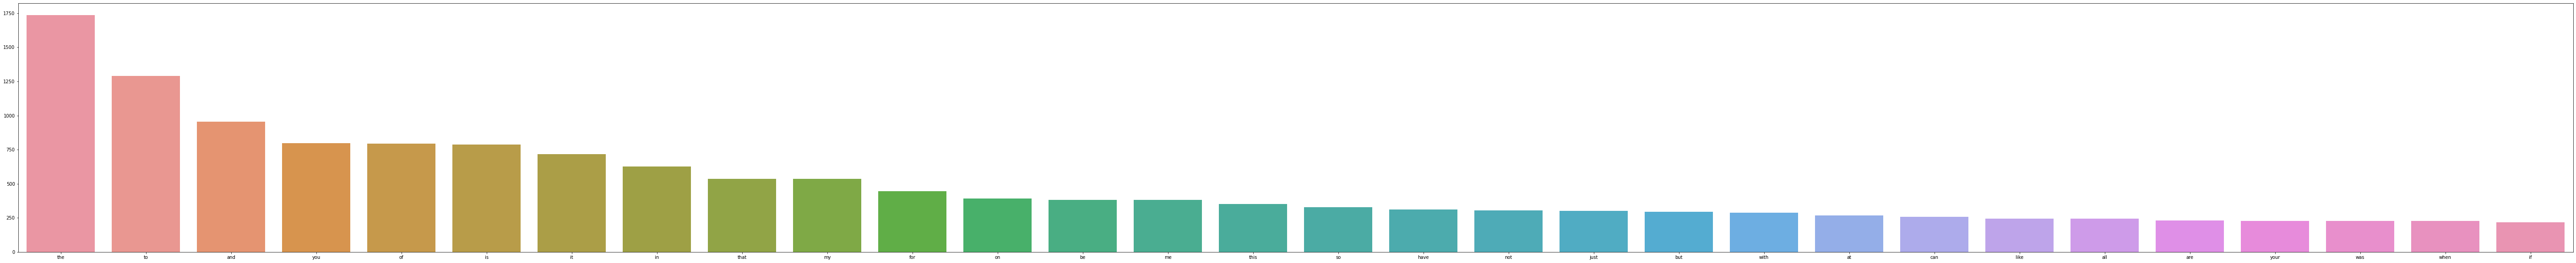

In [11]:
plt.subplots(figsize=(100,10))
figure = sns.barplot(x=train_focus_voc[:30], 
                     y=train_term_frequencies[train_focus_index[:30]])

In [12]:
test_count_vect = CountVectorizer()
test_df_counts = test_count_vect.fit_transform(test_df.text)
analyze = test_count_vect.build_analyzer()
test_df_counts.shape
test_term_frequencies = []
test_term_frequencies = np.asarray(test_df_counts.sum(axis=0))[0]
test_focus_index = np.argsort(test_term_frequencies)[::-1]
test_focus_voc = [test_count_vect.get_feature_names()[i] for i in test_focus_index[:]]
print(f'first 30 frequent voc in testing data: {test_focus_voc[:30]}')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


first 30 frequent voc in testing data: ['the', 'to', 'and', 'it', 'of', 'you', 'is', 'in', 'for', 'that', 'my', 'on', 'be', 'me', 'was', 'so', 'can', 'at', 'have', 'all', 'just', 'are', 'with', 'but', 'get', 'your', 'up', 'this', 'like', 'not']


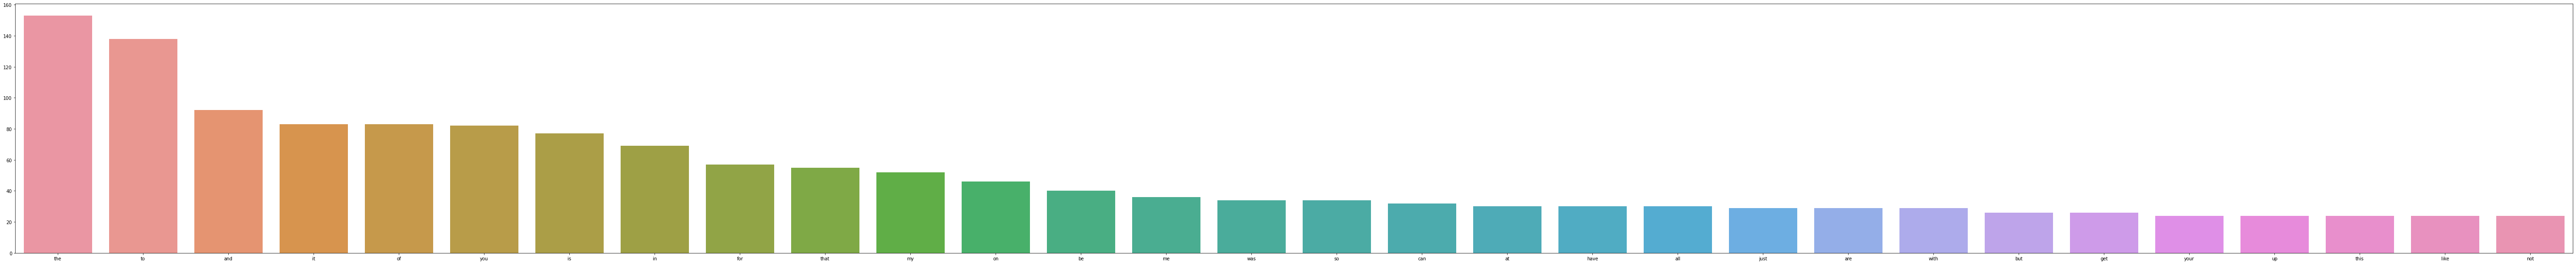

In [13]:
plt.subplots(figsize=(100,10))
figure = sns.barplot(x=test_focus_voc[:30], 
                     y=test_term_frequencies[test_focus_index[:30]])

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [14]:
# --- save to pickle file --- #
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [15]:
import pandas as pd

# --- load a pickle file --- #
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [16]:
# --- group to find distribution --- #
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

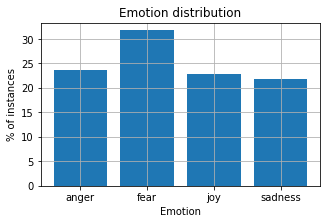

In [24]:
%matplotlib inline

# --- calculate the histogram --- #
post_total = len(train_df)
emotion_value = train_df.groupby(['emotion']).count()['text']
emotion_value = emotion_value.apply(lambda x: round(x * 100 / post_total, 3))

# --- plot --- #
figure, axis = plt.subplots(figsize=(5,3))
plt.bar(emotion_value.index, emotion_value.values)

# --- rearragne labels --- #
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()


2. Second: __This part is worth30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [17]:
### Begin Assignment Here